# Breast Cancer Classification

In [1]:
!pip install imblearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
# Import dari sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

### 1. Memberi nama atribut setiap kolom

In [2]:
column_name = ["Sample_code_number","Clump_thickness","Uniformity_of_cell_size","Uniformity_of_cell_shape","Marginal_adhesion","Single_epithelial_cell_size","Bare_nuclei","Bland_chromatin","Normal_nucleoli","Mitoses","Class"]

### 2. Read data

In [3]:
data = pd.read_csv('../data/raw/breast-cancer-wisconsin.csv', names= column_name, header=None)

In [4]:
#cek ukuran
data.shape

(699, 11)

In [5]:
#cek data dan atributnya sesuaikah
data

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


### 3. Cek dan drop kolom yang tidak dipakai dan duplikasi data

In [6]:
# hapus kolom yang tidak dipakai dan cek duplikasi
data = data.drop('Sample_code_number',
                        axis=1)

duplicated = data.duplicated()
duplicated.sum()

236

In [7]:
data[duplicated]

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
28,2,1,1,1,2,1.0,2,1,1,2
35,2,1,1,1,2,1.0,2,1,1,2
48,4,1,1,3,2,1.0,3,1,1,2
64,1,1,1,1,2,1.0,2,1,1,2
66,4,1,1,1,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
686,1,1,1,1,2,1.0,1,1,1,2
688,4,1,1,1,2,1.0,1,1,1,2
690,1,1,1,3,2,1.0,1,1,1,2
692,3,1,1,1,2,1.0,1,1,1,2


In [8]:
#drop duplikat
data = data.drop_duplicates()

In [9]:
data.shape

(463, 10)

In [10]:
data.isnull().sum()

Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    14
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

### 4. Split Input & Output Data

In [11]:
target_data = pd.DataFrame(data['Class'])
input_data = data.drop(columns=target_data)

In [12]:
input_data

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...
693,3,1,1,1,2,1.0,2,1,2
694,3,1,1,1,3,2.0,1,1,1
696,5,10,10,3,7,3.0,8,10,2
697,4,8,6,4,3,4.0,10,6,1


### 5. Set training & Test data

In [13]:
# Import train-test splitting library dari sklearn (scikit learn)
from sklearn.model_selection import train_test_split

# Train test split
x_train, x_test, y_train, y_test = train_test_split(input_data, target_data,
                                                    test_size = 0.2,
                                                    random_state = 123,
                                                    stratify = target_data)

In [14]:
#cek ukuran data
x_train.shape, x_test.shape

((370, 9), (93, 9))

In [15]:
y_train.loc[y_train.Class == 2].count()/y_train.count(), y_train.loc[y_train.Class == 4].count()/y_train.count()

(Class    0.486486
 dtype: float64,
 Class    0.513514
 dtype: float64)

In [16]:
#Ratio
x_train.shape[0]/data.shape[0],x_test.shape[0]/data.shape[0]

(0.7991360691144709, 0.20086393088552915)

In [17]:
x_train.head()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
493,5,10,10,10,6,10.0,6,5,2
80,2,2,2,1,1,1.0,7,1,1
262,8,8,9,4,5,10.0,7,8,1
300,8,4,10,5,4,4.0,7,10,1
123,5,3,5,1,8,10.0,5,3,1


In [18]:
data_train = pd.concat([x_train, y_train], axis = 1)

### 4. Cek unbalance class

<AxesSubplot:xlabel='Class', ylabel='Count'>

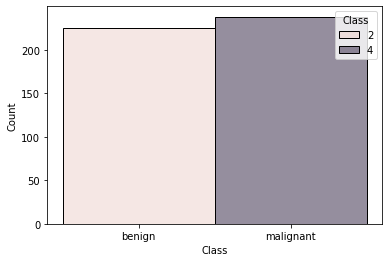

In [19]:
sns.histplot(data = data, x = data["Class"].apply(lambda x: "benign" if x==2 else "malignant"), hue="Class")

#### Oversampling

In [20]:
x_train, y_train = RandomOverSampler(random_state = 112).fit_resample(data_train.drop("Class", axis = 1), data_train.Class)
data_train_sm = pd.concat([x_train, y_train], axis = 1)

<AxesSubplot:xlabel='Class', ylabel='Count'>

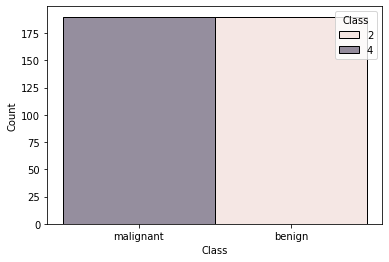

In [21]:
sns.histplot(data = data_train_sm, x = data_train_sm["Class"].apply(lambda x: "benign" if x==2 else "malignant"), hue="Class")

In [22]:
data_train_sm.shape, x_train.shape, y_train.shape

((380, 10), (380, 9), (380,))

In [23]:
joblib.dump(x_train, "x_train.pkl")
joblib.dump(y_train, "y_train.pkl")
joblib.dump(x_test, "x_test.pkl")
joblib.dump(y_test, "y_test.pkl")

['y_test.pkl']

### 7. Imputasi Missing Value

#### Cek data yang kosong dari variabel input di data training

In [24]:
x_train.isnull().sum()

Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    10
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
dtype: int64

<AxesSubplot:xlabel='Bare_nuclei', ylabel='Density'>

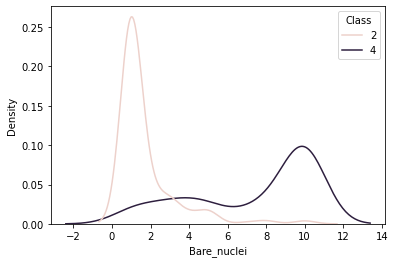

In [25]:
sns.kdeplot(data = x_train, x = x_train.Bare_nuclei, hue= y_train )

In [26]:
# data Bare_nuclei memiliki kurva skew terhadap class, karena itu nilai imputernya akan dicari dengan memanfaatkan nilai median

#### Impute Missing Value

In [27]:
imputer = SimpleImputer(missing_values = np.nan,
                        strategy = "median")

In [28]:
#kolom yang mengandung missing value
numerical_column = ['Bare_nuclei']
missingval_data = pd.DataFrame(x_train[numerical_column])

#fit imputer
imputer.fit(missingval_data)

#transform
imputed_data = imputer.transform(missingval_data)
numerical_data_imputed = pd.DataFrame(imputed_data)

numerical_data_imputed.columns = numerical_column
numerical_data_imputed.index = missingval_data.index

In [29]:
numerical_data_imputed

,Bare_nuclei
0,10.0
1,1.0
2,10.0
3,4.0
4,10.0
...,...
375,1.0
376,1.0
377,1.0
378,3.0


#### Mengganti kolom yang berisi missing value dengan yang sudah diimputasi

In [30]:
x_train[numerical_column] = numerical_data_imputed

In [31]:
x_train[numerical_column].isnull().sum()

Bare_nuclei    0
dtype: int64

In [32]:
x_train

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
0,5,10,10,10,6,10.0,6,5,2
1,2,2,2,1,1,1.0,7,1,1
2,8,8,9,4,5,10.0,7,8,1
3,8,4,10,5,4,4.0,7,10,1
4,5,3,5,1,8,10.0,5,3,1
...,...,...,...,...,...,...,...,...,...
375,8,4,6,3,3,1.0,4,3,1
376,5,1,1,6,3,1.0,1,1,1
377,4,1,1,1,3,1.0,1,1,1
378,3,1,1,1,2,3.0,3,1,1


### 8.Standardizing variables

In [33]:
# Buat fungsi
def standardizerData(data):
    """
    Fungsi untuk melakukan standarisasi data
    :param data: <pandas dataframe> sampel data
    :return standardized_data: <pandas dataframe> sampel data standard
    :return standardizer: method untuk standardisasi data
    """
    data_columns = data.columns  # agar nama kolom tidak hilang
    data_index = data.index  # agar index tidak hilang

    # buat (fit) standardizer
    standardizer = StandardScaler()
    standardizer.fit(data)

    # transform data
    standardized_data_raw = standardizer.transform(data)
    standardized_data = pd.DataFrame(standardized_data_raw)
    standardized_data.columns = data_columns
    standardized_data.index = data_index

    return standardized_data, standardizer

In [34]:
x_train_clean, standardizer = standardizerData(data = x_train)

In [35]:
x_train_clean.head()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
0,-0.077136,1.846053,1.872613,2.056347,0.905073,1.44950,0.698857,0.379386,0.065983
1,-1.136600,-0.640434,-0.690531,-0.853337,-1.147002,-0.94417,1.073950,-0.807171,-0.425654
2,0.982327,1.224431,1.552220,0.116558,0.494658,1.44950,1.073950,1.269304,-0.425654
3,0.982327,-0.018812,1.872613,0.439856,0.084243,-0.14628,1.073950,1.862583,-0.425654
4,-0.077136,-0.329623,0.270648,-0.853337,1.725903,1.44950,0.323764,-0.213893,-0.425654


In [36]:
joblib.dump(x_train_clean,"x_train_clean.pkl")

['x_train_clean.pkl']

### 9. Cek Korelasi 

In [37]:
corr = data_train_sm.corr()

In [38]:
corr_target = abs(corr['Class'])

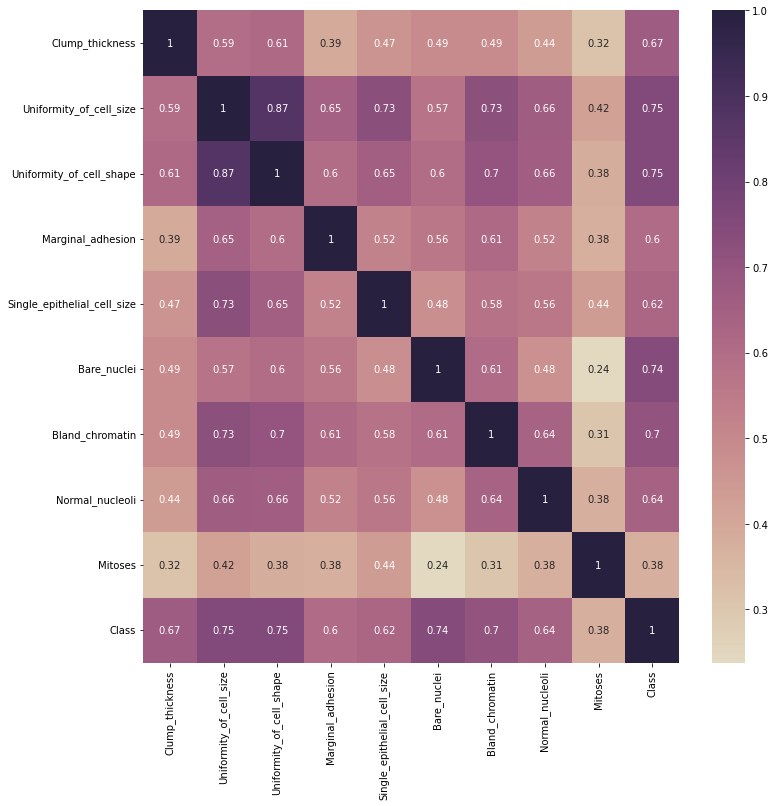

In [39]:
plt.figure(figsize=(12,12))
sns.heatmap(corr, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True),annot=True)
plt.show()

In [40]:
x_train_clean

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
0,-0.077136,1.846053,1.872613,2.056347,0.905073,1.449500,0.698857,0.379386,0.065983
1,-1.136600,-0.640434,-0.690531,-0.853337,-1.147002,-0.944170,1.073950,-0.807171,-0.425654
2,0.982327,1.224431,1.552220,0.116558,0.494658,1.449500,1.073950,1.269304,-0.425654
3,0.982327,-0.018812,1.872613,0.439856,0.084243,-0.146280,1.073950,1.862583,-0.425654
4,-0.077136,-0.329623,0.270648,-0.853337,1.725903,1.449500,0.323764,-0.213893,-0.425654
...,...,...,...,...,...,...,...,...,...
375,0.982327,-0.018812,0.591041,-0.206741,-0.326172,-0.944170,-0.051328,-0.213893,-0.425654
376,-0.077136,-0.951245,-1.010924,0.763154,-0.326172,-0.944170,-1.176607,-0.807171,-0.425654
377,-0.430291,-0.951245,-1.010924,-0.853337,-0.326172,-0.944170,-1.176607,-0.807171,-0.425654
378,-0.783445,-0.951245,-1.010924,-0.853337,-0.736587,-0.412243,-0.426421,-0.807171,-0.425654


Karena jumlah variabel/fitur hanya 9 dan setiap variabel memiliki korelasi terhadap target dengan nilai diatas threshold (Threshold yg dipakai 0.2), maka tidak ada variabel yang dihapus. 

## Training Machine Learning

#### Baseline

In [41]:
data_train["Class"].value_counts(normalize = True)

4    0.513514
2    0.486486
Name: Class, dtype: float64

baseline didapat dari proporsi kelas terbesar, yaitu 52.16%

#### Membuat model

In [42]:
knn = KNeighborsClassifier()
logreg = LogisticRegression(random_state = 123) 
svm = SVC()
rf = RandomForestClassifier()

#### Eksperimentasi dengan menggunakan cross validation

In [43]:
def searchBestParam (x_train, y_train, model_estimator, params, fold):
    """
    fungsi untuk train data menggunakan grid search cross validation
    :param x_train: <pandas DataFrame> input data yang akan di training
    :param y_train: <pandas Dataframe> target data
    :param model_estimator:<list> list estimator
    :param params: <list> list parameter yang akan dieksperimenkan
    :fold: <int> jumlah fold yang akan digunakan pada cross validation
    :scoring: <str> tipe scoring
    """
    
    model_cv = GridSearchCV(estimator = model_estimator,
                           param_grid = params,
                           cv = fold,
                           n_jobs = -1,
                           verbose = 5,
                           scoring = "accuracy")
    model_cv.fit(x_train, y_train)
    
    return model_cv

In [119]:
#set parameters for each models
models = {"estimator" : [knn, 
                         logreg
                        ],
          "params": [{"n_neighbors": [3,5,7,9], "p":[1,2]},
                     {"solver" :["lbfgs", "liblinear"],"C":np.logspace(-5, 5,20)}
                    ]
             }

#search best parameter
cv_models = []
best_param = []
cv_best_acc = []
j = 0
for i in models["estimator"]:
        cv_models.append(searchBestParam (x_train, y_train, models["estimator"][j], models["params"][j],5))
        best_param.append(cv_models[j].best_params_)
        cv_best_acc.append(cv_models[j].best_score_) 
        j+=1

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [112]:
best_param

[{'n_neighbors': 5, 'p': 2}, {'C': 0.04832930238571752, 'solver': 'lbfgs'}]

In [113]:
cv_best_acc

[0.9526315789473685, 0.9473684210526315]

In [ ]:
k=0
train_model = []
for i in models["estimator"]:
    train_model[k].append()

### knn

In [44]:
knn_params = {"n_neighbors": [3,5,7,9], "p":[1,2]}

In [45]:
fold = 5

In [46]:
knn_best_model = searchBestParam(x_train_clean, y_train.values.ravel(), knn, knn_params, fold )

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [47]:
knn_best_model.cv_results_

{'mean_fit_time': array([0.01741228, 0.01489348, 0.01992855, 0.01730065, 0.0152699 ,
        0.01390486, 0.01875014, 0.01791453]),
 'std_fit_time': array([0.00178611, 0.00252213, 0.00567136, 0.00390337, 0.00115354,
        0.00149884, 0.00209228, 0.00404267]),
 'mean_score_time': array([0.04310346, 0.04898458, 0.04768324, 0.04487271, 0.04068289,
        0.04355536, 0.04620576, 0.04108787]),
 'std_score_time': array([0.00441301, 0.00810458, 0.00608374, 0.00486194, 0.00193019,
        0.00213934, 0.00559605, 0.00256082]),
 'param_n_neighbors': masked_array(data=[3, 3, 5, 5, 7, 7, 9, 9],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_p': masked_array(data=[1, 2, 1, 2, 1, 2, 1, 2],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3, 'p': 1},
  {'n_neighbors': 3, 'p': 2},
  {'n_neighbors': 5, 'p'

In [48]:
cv_result = []

In [49]:
for i in range(fold):
    cv_result.append(knn_best_model.cv_results_['split'+str(i)+'_test_score'])
cv_result.append(knn_best_model.cv_results_['mean_test_score'])

In [50]:
cv_result

[array([0.96052632, 0.93421053, 0.96052632, 0.96052632, 0.96052632,
        0.96052632, 0.96052632, 0.96052632]),
 array([0.93421053, 0.93421053, 0.92105263, 0.93421053, 0.92105263,
        0.94736842, 0.92105263, 0.94736842]),
 array([0.96052632, 0.92105263, 0.96052632, 0.93421053, 0.94736842,
        0.94736842, 0.94736842, 0.94736842]),
 array([0.97368421, 0.94736842, 0.97368421, 0.94736842, 0.96052632,
        0.96052632, 0.96052632, 0.96052632]),
 array([0.90789474, 0.90789474, 0.90789474, 0.90789474, 0.92105263,
        0.90789474, 0.93421053, 0.93421053]),
 array([0.94736842, 0.92894737, 0.94473684, 0.93684211, 0.94210526,
        0.94473684, 0.94473684, 0.95      ])]

In [51]:
knn_cv_result = pd.DataFrame(cv_result).transpose()
knn_cv_result.columns = ["1st fold","2nd fold","3rd fold", "4th fold", "5th fold", "mean accuracy"]
knn_cv_result

,1st fold,2nd fold,3rd fold,4th fold,5th fold,mean accuracy
0,0.960526,0.934211,0.960526,0.973684,0.907895,0.947368
1,0.934211,0.934211,0.921053,0.947368,0.907895,0.928947
2,0.960526,0.921053,0.960526,0.973684,0.907895,0.944737
3,0.960526,0.934211,0.934211,0.947368,0.907895,0.936842
4,0.960526,0.921053,0.947368,0.960526,0.921053,0.942105
5,0.960526,0.947368,0.947368,0.960526,0.907895,0.944737
6,0.960526,0.921053,0.947368,0.960526,0.934211,0.944737
7,0.960526,0.947368,0.947368,0.960526,0.934211,0.950000


In [52]:
acc_knn_cv = knn_best_model.best_score_

In [53]:
knn_best_model.best_params_

{'n_neighbors': 9, 'p': 2}

In [54]:
# fit using best parameter
knn = KNeighborsClassifier(n_neighbors = knn_best_model.best_params_['n_neighbors'],p=knn_best_model.best_params_['p'])
knn.fit(x_train_clean,y_train.values.ravel())

KNeighborsClassifier(n_neighbors=9)

In [55]:
predicted_knn = pd.DataFrame(knn.predict(x_train_clean))
acc_knn_train = knn.score(x_train_clean, y_train)

In [56]:
print(f"akurasi KNN : -train = {acc_knn_train:.4f}, -cv = {acc_knn_cv:.4f}")

akurasi KNN : -train = 0.9500, -cv = 0.9500


In [57]:
print(classification_report(predicted_knn, y_train, digits=5))

              precision    recall  f1-score   support

           2    0.94737   0.95238   0.94987       189
           4    0.95263   0.94764   0.95013       191

    accuracy                        0.95000       380
   macro avg    0.95000   0.95001   0.95000       380
weighted avg    0.95001   0.95000   0.95000       380



### logistic regression

In [58]:
logreg_params = {"solver" :["lbfgs", "liblinear"],
                 "C":np.logspace(-5, 5,20)}

In [59]:
logreg_best_model = searchBestParam(x_train_clean, y_train.values.ravel(), logreg, logreg_params, fold )

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [60]:
logreg_best_model.cv_results_

{'mean_fit_time': array([0.05439444, 0.02045989, 0.02282605, 0.01799545, 0.02579551,
        0.01536555, 0.02976165, 0.01916552, 0.03237705, 0.01557922,
        0.02877841, 0.01416082, 0.03041372, 0.01595201, 0.03133059,
        0.01694059, 0.03077269, 0.02107277, 0.03912201, 0.01757679,
        0.03986473, 0.0165679 , 0.03785057, 0.01558146, 0.04315643,
        0.01708713, 0.04679518, 0.03479986, 0.061199  , 0.01959929,
        0.05579686, 0.02119918, 0.04843831, 0.0227994 , 0.04762707,
        0.0180232 , 0.03862963, 0.01682949, 0.03815675, 0.01421638]),
 'std_fit_time': array([0.02092552, 0.00806935, 0.00265872, 0.0010954 , 0.00493048,
        0.00171954, 0.00212303, 0.00385472, 0.00597997, 0.00243929,
        0.00248012, 0.00101238, 0.00432321, 0.00101709, 0.00443473,
        0.00249282, 0.00155254, 0.00506467, 0.00169395, 0.00346108,
        0.00172908, 0.00280172, 0.00310284, 0.00049013, 0.00558719,
        0.00232852, 0.0081649 , 0.00577681, 0.00795949, 0.00185495,
        0.008

In [61]:
logreg_result = []
for i in range(fold):
    logreg_result.append(logreg_best_model.cv_results_['split'+str(i)+'_test_score'])
logreg_result.append(logreg_best_model.cv_results_['mean_test_score'])

In [62]:
logreg_cv_result = pd.DataFrame(logreg_result).transpose()
logreg_cv_result.columns = ["1st fold","2nd fold","3rd fold", "4th fold", "5th fold", "mean accuracy"]
logreg_cv_result

,1st fold,2nd fold,3rd fold,4th fold,5th fold,mean accuracy
0,0.921053,0.894737,0.921053,0.960526,0.934211,0.926316
1,0.921053,0.894737,0.921053,0.960526,0.934211,0.926316
2,0.921053,0.894737,0.921053,0.960526,0.934211,0.926316
3,0.921053,0.894737,0.921053,0.960526,0.934211,0.926316
4,0.921053,0.894737,0.934211,0.960526,0.934211,0.928947
5,0.921053,0.894737,0.921053,0.960526,0.934211,0.926316
6,0.907895,0.894737,0.934211,0.960526,0.934211,0.926316
7,0.907895,0.907895,0.921053,0.960526,0.934211,0.926316
8,0.934211,0.907895,0.934211,0.960526,0.934211,0.934211
9,0.934211,0.907895,0.921053,0.960526,0.934211,0.931579


In [63]:
acc_logreg_cv = logreg_best_model.best_score_

In [64]:
logreg_best_model.best_params_

{'C': 0.004281332398719391, 'solver': 'lbfgs'}

In [65]:
# fit using best parameter
logreg = LogisticRegression(solver = logreg_best_model.best_params_['solver'],
                            C = logreg_best_model.best_params_['C'])
logreg.fit(x_train_clean,y_train.values.ravel())

LogisticRegression(C=0.004281332398719391)

In [66]:
predicted_logreg = pd.DataFrame(logreg.predict(x_train_clean))
acc_logreg_train = logreg.score(x_train_clean, y_train)

In [67]:
print(f"akurasi Logreg : -train = {acc_logreg_train:.4f}, -cv = {acc_logreg_cv:.4f}")

akurasi Logreg : -train = 0.9447, -cv = 0.9474


In [68]:
print(classification_report(predicted_logreg, y_train, digits=5))

              precision    recall  f1-score   support

           2    0.95789   0.93333   0.94545       195
           4    0.93158   0.95676   0.94400       185

    accuracy                        0.94474       380
   macro avg    0.94474   0.94505   0.94473       380
weighted avg    0.94508   0.94474   0.94475       380



### SVM

In [69]:
svm_params = {"kernel": ["linear","poly", "rbf", "sigmoid"],
              "C": np.logspace(-5,5,20)}

In [70]:
svm_best_model = searchBestParam(x_train_clean, y_train.values.ravel(), svm, svm_params, fold )

Fitting 5 folds for each of 80 candidates, totalling 400 fits


In [71]:
svm_best_model.cv_results_

{'mean_fit_time': array([2.86557674e-02, 3.73423576e-02, 4.69271183e-02, 4.58085060e-02,
        3.38618279e-02, 3.25456619e-02, 4.19297695e-02, 4.00399685e-02,
        3.32279682e-02, 3.47599983e-02, 4.55805302e-02, 4.16714668e-02,
        3.46070766e-02, 3.58934879e-02, 4.28652287e-02, 4.30778503e-02,
        2.82201767e-02, 3.43514919e-02, 4.12090778e-02, 4.15462494e-02,
        2.01750755e-02, 3.51255417e-02, 4.12006855e-02, 4.16720867e-02,
        1.82384491e-02, 3.03625584e-02, 4.00726318e-02, 3.08340073e-02,
        1.67696476e-02, 2.55704880e-02, 2.86082745e-02, 2.39875317e-02,
        2.03124523e-02, 2.39540100e-02, 2.44379997e-02, 2.28498936e-02,
        1.80172920e-02, 2.00675488e-02, 2.02703953e-02, 1.89362526e-02,
        2.22786427e-02, 1.87578201e-02, 2.17632771e-02, 1.80654526e-02,
        2.48404503e-02, 1.80905342e-02, 2.08621025e-02, 1.59469128e-02,
        4.15198326e-02, 2.05237865e-02, 1.97806835e-02, 2.15956211e-02,
        1.42768621e-01, 2.25986958e-02, 2.42011

In [72]:
svm_result = []
for i in range(fold):
    svm_result.append(svm_best_model.cv_results_['split'+str(i)+'_test_score'])
svm_result.append(svm_best_model.cv_results_['mean_test_score'])

In [73]:
svm_cv_result = pd.DataFrame(svm_result).transpose()
svm_cv_result.columns = ["1st fold","2nd fold","3rd fold", "4th fold", "5th fold", "mean accuracy"]
svm_cv_result

,1st fold,2nd fold,3rd fold,4th fold,5th fold,mean accuracy
0,0.881579,0.776316,0.894737,0.828947,0.802632,0.836842
1,0.513158,0.539474,0.578947,0.526316,0.513158,0.534211
2,0.960526,0.921053,0.947368,0.947368,0.947368,0.944737
3,0.894737,0.881579,0.921053,0.921053,0.881579,0.900000
4,0.881579,0.776316,0.894737,0.828947,0.802632,0.836842
...,...,...,...,...,...,...
75,0.973684,0.907895,0.907895,0.921053,0.947368,0.931579
76,0.960526,0.947368,0.894737,0.947368,0.934211,0.936842
77,0.894737,0.881579,0.934211,0.907895,0.921053,0.907895
78,0.907895,0.894737,0.947368,0.960526,0.934211,0.928947


In [74]:
acc_svm_cv = svm_best_model.best_score_

In [75]:
svm_best_model.best_params_

{'C': 0.5455594781168515, 'kernel': 'poly'}

In [76]:
# fit using best parameter
svm = SVC(kernel = svm_best_model.best_params_['kernel'], C=svm_best_model.best_params_['C'])
svm.fit(x_train_clean,y_train.values.ravel())

SVC(C=0.5455594781168515, kernel='poly')

In [77]:
predicted_svm = pd.DataFrame(svm.predict(x_train_clean))
acc_svm_train = svm.score(x_train_clean, y_train)

In [78]:
print(f"akurasi svm : -train = {acc_svm_train:.4f}, -cv = {acc_svm_cv:.4f}")

akurasi svm : -train = 0.9605, -cv = 0.9553


In [79]:
print(classification_report(predicted_svm, y_train, digits=5))

              precision    recall  f1-score   support

           2    0.93158   0.98883   0.95935       179
           4    0.98947   0.93532   0.96164       201

    accuracy                        0.96053       380
   macro avg    0.96053   0.96208   0.96049       380
weighted avg    0.96220   0.96053   0.96056       380



### Random Forest

In [80]:
rf_params = {"n_estimators": [10,20,30,40,50,60,70,80,90,100],
             "max_features": ['sqrt', 'log2']}

In [81]:
rf_best_model = searchBestParam(x_train_clean, y_train.values.ravel(), rf, rf_params, fold )

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [82]:
rf_best_model.cv_results_

{'mean_fit_time': array([0.11312227, 0.21436086, 0.34484491, 0.41490335, 0.50274129,
        0.88854389, 0.97996044, 0.9508028 , 1.10674572, 1.27086902,
        0.14259939, 0.27861481, 0.41063652, 0.50507612, 0.56319504,
        0.61910133, 0.70516987, 0.77781363, 0.91273918, 1.0222002 ]),
 'std_fit_time': array([0.00862868, 0.00702215, 0.03181396, 0.02262627, 0.02107515,
        0.15296587, 0.11722998, 0.01188414, 0.03201381, 0.01165863,
        0.01527018, 0.01768659, 0.0079204 , 0.03182429, 0.02097624,
        0.01938991, 0.01530102, 0.0119904 , 0.01535263, 0.03755575]),
 'mean_score_time': array([0.01763206, 0.02430773, 0.04451003, 0.04160891, 0.04642167,
        0.1169466 , 0.07882719, 0.09065742, 0.10146928, 0.12183771,
        0.02508702, 0.03065238, 0.04351377, 0.05046024, 0.05286198,
        0.05648942, 0.06419854, 0.07176437, 0.08225465, 0.09304438]),
 'std_score_time': array([0.00201662, 0.00107211, 0.00994138, 0.00371524, 0.00157822,
        0.03946584, 0.009701  , 0.004082

In [83]:
rf_result = []
for i in range(fold):
    rf_result.append(rf_best_model.cv_results_['split'+str(i)+'_test_score'])
rf_result.append(rf_best_model.cv_results_['mean_test_score'])

In [84]:
rf_cv_result = pd.DataFrame(rf_result).transpose()
rf_cv_result.columns = ["1st fold","2nd fold","3rd fold", "4th fold", "5th fold", "mean accuracy"]
rf_cv_result

,1st fold,2nd fold,3rd fold,4th fold,5th fold,mean accuracy
0,0.934211,0.921053,0.960526,0.947368,0.947368,0.942105
1,0.934211,0.960526,0.960526,0.947368,0.947368,0.950000
2,0.960526,0.934211,0.947368,0.973684,0.947368,0.952632
3,0.947368,0.960526,0.960526,0.973684,0.934211,0.955263
4,0.947368,0.960526,0.960526,0.973684,0.960526,0.960526
5,0.947368,0.921053,0.960526,0.986842,0.947368,0.952632
6,0.947368,0.947368,0.960526,0.973684,0.960526,0.957895
7,0.934211,0.947368,0.960526,0.986842,0.934211,0.952632
8,0.947368,0.960526,0.960526,0.973684,0.960526,0.960526
9,0.947368,0.934211,0.960526,0.960526,0.960526,0.952632


In [85]:
acc_rf_cv = rf_best_model.best_score_

In [86]:
rf_best_model.best_params_

{'max_features': 'log2', 'n_estimators': 90}

In [87]:
# fit using best parameter
rf = RandomForestClassifier(max_features = rf_best_model.best_params_['max_features'],
                            n_estimators = rf_best_model.best_params_['n_estimators'],
                            random_state = 123)
rf.fit(x_train_clean,y_train.values.ravel())

RandomForestClassifier(max_features='log2', n_estimators=90, random_state=123)

In [88]:
predicted_rf = pd.DataFrame(rf.predict(x_train_clean))
acc_rf_train = rf.score(x_train_clean, y_train)

In [89]:
print(f"akurasi rf : -train = {acc_rf_train:.4f}, -cv = {acc_rf_cv:.4f}")

akurasi rf : -train = 1.0000, -cv = 0.9605


In [90]:
print(classification_report(predicted_rf, y_train, digits=5))

              precision    recall  f1-score   support

           2    1.00000   1.00000   1.00000       190
           4    1.00000   1.00000   1.00000       190

    accuracy                        1.00000       380
   macro avg    1.00000   1.00000   1.00000       380
weighted avg    1.00000   1.00000   1.00000       380



### Comparison

In [91]:
best_parameter = [knn_best_model.best_params_, logreg_best_model.best_params_, svm_best_model.best_params_, rf_best_model.best_params_]
acc_train = [acc_knn_train, acc_logreg_train, acc_svm_train, acc_rf_train]
acc_cv = [acc_knn_cv, acc_logreg_cv, acc_svm_cv, acc_rf_cv]
indexes = ["KNN", "Logistic Regression", "SVM", "Random Forest"]

summary_df = pd.DataFrame({ "Best Parameter": best_parameter,
                            "Accuracy CV": acc_cv,
                            "Accuracy Train": acc_train
                           },
                          index = indexes)

In [92]:
summary_df

,Best Parameter,Accuracy CV,Accuracy Train
KNN,"{'n_neighbors': 9, 'p': 2}",0.950000,0.950000
Logistic Regression,"{'C': 0.004281332398719391, 'solver': 'lbfgs'}",0.947368,0.944737
SVM,"{'C': 0.5455594781168515, 'kernel': 'poly'}",0.955263,0.960526
Random Forest,"{'max_features': 'log2', 'n_estimators': 90}",0.960526,1.000000


In [126]:
acc_cv.index(np.max(acc_cv))

3

#### Save Model to Pickel

In [93]:
# Simpan model logreg ke dalam folder yang sama dengan notebook
# dengan nama logreg.pkl
joblib.dump(knn, "knn_cv.pkl")
joblib.dump(logreg, "logreg_cv.pkl")
joblib.dump(svm, "svm_cv.pkl")
joblib.dump(rf, "rf_cv.pkl")


['rf_cv.pkl']

## Test Prediction using best model

In [94]:
def extractTest(data,
                numerical_column,
                imputer_numerical, standardizer):
    """
    Fungsi untuk mengekstrak & membersihkan test data 
    :param data: <pandas dataframe> sampel data test
    :param numerical_column: <list> kolom numerik
    :param imputer_numerical: <sklearn method> imputer data numerik
    :param standardizer: <sklearn method> standardizer data
    :return cleaned_data: <pandas dataframe> data final
    """
    # Filter data
    numerical_data = data[numerical_column]
    
    # Proses data numerik
    numerical_data =pd.DataFrame(imputer_numerical.transform(numerical_data))
    numerical_data.columns = numerical_column
    numerical_data.index = data.index

    # Gabungkan data
    data[numerical_column] = numerical_data
    cleaned_data = pd.DataFrame(standardizer.transform(data))
    cleaned_data.columns = data.columns
    cleaned_data.index = data.index
    
    return cleaned_data

In [95]:
x_test

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
319,4,4,4,4,6,5.0,7,3,1
286,10,10,10,10,10,10.0,4,10,10
608,5,10,10,10,10,10.0,10,1,1
75,1,1,2,1,2,2.0,4,2,1
56,8,10,10,1,3,6.0,3,9,1
...,...,...,...,...,...,...,...,...,...
440,10,4,3,10,4,10.0,10,1,1
599,5,2,4,1,1,1.0,1,1,1
522,10,4,5,4,3,5.0,7,3,1
613,2,3,1,1,2,1.0,2,1,1


In [96]:
x_test_clean = extractTest(data = x_test,
                           numerical_column = numerical_column,
                           imputer_numerical = imputer,
                           standardizer = standardizer)

In [97]:
x_test_clean.head()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
319,-0.430291,-0.018812,-0.049745,0.116558,0.905073,0.119684,1.073950,-0.213893,-0.425654
286,1.688636,1.846053,1.872613,2.056347,2.546733,1.449500,-0.051328,1.862583,3.999074
608,-0.077136,1.846053,1.872613,2.056347,2.546733,1.449500,2.199229,-0.807171,-0.425654
75,-1.489754,-0.951245,-0.690531,-0.853337,-0.736587,-0.678207,-0.051328,-0.510532,-0.425654
56,0.982327,1.846053,1.872613,-0.853337,-0.326172,0.385647,-0.426421,1.565944,-0.425654


In [98]:
joblib.dump(x_test_clean,"x_test_clean.pkl")

['x_test_clean.pkl']

In [99]:
rf_test_predict = rf.predict(x_test_clean)

In [100]:
print(classification_report(rf_test_predict, y_test, digits=5))

              precision    recall  f1-score   support

           2    0.91111   1.00000   0.95349        41
           4    1.00000   0.92308   0.96000        52

    accuracy                        0.95699        93
   macro avg    0.95556   0.96154   0.95674        93
weighted avg    0.96081   0.95699   0.95713        93



In [101]:
svm_test_predict = svm.predict(x_test_clean)

In [102]:
print(classification_report(svm_test_predict, y_test, digits=5))

              precision    recall  f1-score   support

           2    0.91111   1.00000   0.95349        41
           4    1.00000   0.92308   0.96000        52

    accuracy                        0.95699        93
   macro avg    0.95556   0.96154   0.95674        93
weighted avg    0.96081   0.95699   0.95713        93



In [103]:
knn_test_predict = knn.predict(x_test_clean)

In [104]:
print(classification_report(knn_test_predict, y_test, digits=5))

              precision    recall  f1-score   support

           2    0.91111   1.00000   0.95349        41
           4    1.00000   0.92308   0.96000        52

    accuracy                        0.95699        93
   macro avg    0.95556   0.96154   0.95674        93
weighted avg    0.96081   0.95699   0.95713        93

